# GITHUB BUGS PREDICTION
[Indrajit Singh](https://www.linkedin.com/in/indrajitsinghds/) - December 2020


----------
## My First Kaggle Notebook

This notebook simplifies the steps to solve github bug prediction through a typical workflow using BERT base uncased model. Before we get started with the workflow , the first question that comes into our mind is how do we get started. Well we will get there but let's first understand what exactly the problem statement is and what is expected here?

# BERT

# *  What is BERT?

BERT is the first deeply bidirectional, unsupervised language representation, pre-trained using only a plain text corpus (in this case, Wikipedia).

# *  What Makes BERT Different?

BERT builds upon recent work in pre-training contextual representations — including Semi-supervised Sequence Learning, Generative Pre-Training, ELMo, and ULMFit. However, unlike these previous models, BERT is the first deeply bidirectional, unsupervised language representation, pre-trained using only a plain text corpus (in this case, Wikipedia).

# *  Why does pretrained language models makes a difference?

Pre-trained representations can either be **context-free** or **contextual**, and contextual representations can further be unidirectional or bidirectional. 

* Context-free models such as word2vec or GloVe generate a single word embedding representation for each word in the vocabulary. For example, the word “bank” would have the same context-free representation in “bank account” and “bank of the river.” 

* Contextual models instead generate a representation of each word that is based on the other words in the sentence. For example, in the sentence “I accessed the bank account,” a unidirectional contextual model would represent “bank” based on “I accessed the” but not “account.” 

However, BERT represents “bank” using both its previous and next context — “I accessed the ... account” — starting from the very bottom of a deep neural network, making it deeply bidirectional.

Read more about Basic BERT [here](http://https://arxiv.org/pdf/1810.04805.pdf).

In this Notebook we will be using BERT Base Uncased, from [Hugging Face Library](http://https://huggingface.co/bert-base-uncased). 
________________________________________
**Model: bert-base-uncased**

*        12-layer, 768-hidden, 12-heads, 110M parameters.

*        Trained on lower-cased English text.

```
@article{DBLP:journals/corr/abs-1810-04805,
  author    = {Jacob Devlin and
               Ming{-}Wei Chang and
               Kenton Lee and
               Kristina Toutanova},
  title     = {{BERT:} Pre-training of Deep Bidirectional Transformers for Language
               Understanding},
  journal   = {CoRR},
  volume    = {abs/1810.04805},
  year      = {2018},
  url       = {http://arxiv.org/abs/1810.04805},
  archivePrefix = {arXiv},
  eprint    = {1810.04805},
  timestamp = {Tue, 30 Oct 2018 20:39:56 +0100},
  biburl    = {https://dblp.org/rec/journals/corr/abs-1810-04805.bib},
  bibsource = {dblp computer science bibliography, https://dblp.org}
}
```

## **Problem Statement:**

 [MachineHack](http://https://www.machinehack.com/) a Biggest Machine Learning Community For Data Science & AI Enthusiastshas comeup with one of the popular Hackathon on GitHub bugs prediction. 
 
Detecting defects in software systems is an evergreen topic, since there is no real world software without bugs. There are many algorithms that has come up recently to help developers find bugs in software. The challenges of having curated datasets for own domain specific software , or code relates bug finding is rare. You can go through the [research paper](http://https://www.researchgate.net/publication/304664263_A_Public_Bug_Database_of_GitHub_Projects_and_Its_Application_in_Bug_Prediction) for gaining more ideas on Bug Prediction Databases and related algorithms that can be used.

In this Hackathon proposed by Machinehack , we need to come up with an algorithm that can predict the bugs, features, and questions based on GitHub titles and the text body. 


The Dataset has three columns Title, Body and Label: 

*     **-Title** - the title of the GitHub bug, feature question

*     **-Body** - the body of the GitHub bug, feature question

*     **-Label** - Represents various classes of Labels

Once we clean up the dataset [embold_train.json, embold_test.json] and make it ready for the model we need feed the data to a specifc model (Here we using BERT base uncased as pretrained model to predict the expected outcome )




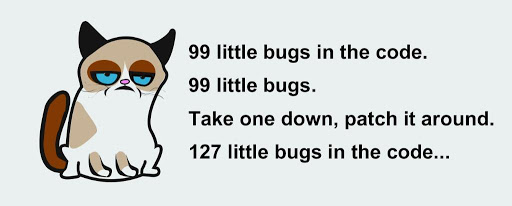




    Bug - 0
    Feature - 1
    Question - 2





# Workflow

1. Problem Statement.
1. Geting Started.
1. Train and Test data 
1. Analyze, identify patterns, and explore the data.
1. Model, predict and solve the problem.
1. Visualize, report, and present the problem solving steps and final solution.
1. Supply or submit the results.

# **Getting Started**

## **Importing the essential libraries**


Importing the required libraries at the begining of your notebook helps you run your code seemless . We frequenly get interrupted by the missing library errors or any other imports which can be avoided by importing them early.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import os
import torch
import pandas as pd
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torch.optim import lr_scheduler
from sklearn import model_selection
from sklearn import metrics
import transformers
import tokenizers
from transformers import AdamW
from transformers import get_linear_schedule_with_warmup
from tqdm.autonotebook import tqdm
from tokenizers import BertWordPieceTokenizer
import matplotlib.pyplot as plt
import torch.nn as nn
import seaborn as sns
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import Dataset, DataLoader


import warnings
warnings.filterwarnings('ignore')

## Load The Dataset

In [ ]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Let's create a dataframe

In [ ]:
data_frame = pd.read_json('/kaggle/input/github-bugs-prediction/embold_train.json')

# **Data Set**

Currently the title and body is in separate fields. We will combine the title and body to keep them into a single field called text:

### Train Set

In [ ]:
train_df= pd.read_json("/kaggle/input/github-bugs-prediction/embold_train.json").reset_index(drop=True)
train_df.head()

### Test Set

In [ ]:
test_df= pd.read_json("/kaggle/input/github-bugs-prediction/embold_test.json").reset_index(drop=True)
test_df.head()

In [ ]:
train_ex_df= pd.read_json("/kaggle/input/github-bugs-prediction/embold_train_extra.json").reset_index(drop=True)
train_ex_df.head()

Looks like both the train and train extra dataframe contains the same content so let's combine them using concatenation command of pandas on index axis

### Checking the Length of Each Data Frame

In [ ]:
def dataset_length_check(data_frame):
    print(len(data_frame),data_frame.index.shape[-1])
                 
dataset_length_check(train_df)
dataset_length_check(train_ex_df)
dataset_length_check(test_df)


In [ ]:
data_frame = pd.concat([train_df,train_ex_df],ignore_index=True)
data_frame.head()

If we look at the label feild , it is basically divided into three segments as we mentioned earlier:
* Bug - 0
* Feature - 1
* Question - 2

Let's categorize the data fields based on their labels as **df_bug** for all the bugs labeled from the dataset. Similarly we do it for features as **df_feature**  and question as **df_question** respectively.

In [ ]:
data_frame.info()

In [ ]:
print('Total Counts of label column: \n'.format(),data_frame['label'].value_counts())
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='label', data=data_frame)

In [ ]:
df_bug = data_frame[data_frame['label']==0]
df_feature = data_frame[data_frame['label']==1]
df_question = data_frame[data_frame['label']==2]

In [ ]:
label_counts = data_frame.label.value_counts().sort_index()
label_counts

In [ ]:
def fx(x):
    return x['title'] + " " + x['body']   
data_frame['text']= data_frame.apply(lambda x : fx(x),axis=1)
data_frame['text']= data_frame.apply(lambda x : fx(x),axis=1)

# Count the Lables :  Bug, Feature abd Questions

In [ ]:
print('Number of datapoints with label as Bug :',label_counts[0])
print('Number of datapoints with label as Feature :',label_counts[1])
print('Number of datapoints with label as Question :',label_counts[2])

Let's ensure we make text lowercase, remove text in square brackets, remove links, remove punctuation and remove words containing numbers.

# Cleaning the Text Field

In [ ]:
import nltk
import re
import string


def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)

    return text

# Removing Stopwords & Punctuations

In [ ]:
from string import punctuation
from nltk.corpus import stopwords

def remove_stopwords(git_text):
    # filters charecter-by-charecter : ['h', 'e', 'e', 'l', 'o', 'o', ' ', 'm', 'y', ' ', 'n', 'a', 'm', 'e', ' ', 'i', 's', ' ', 'p', 'u', 'r', 'v', 'a']
    remove_punctuation = [ch for ch in git_text if ch not in punctuation]
    # convert them back to sentences and split into words
    remove_punctuation = "".join(remove_punctuation).split()
    filtered_git_text = [word.lower() for word in remove_punctuation if word.lower() not in stopwords.words('english')]
    return filtered_git_text

# Visulaize the Dataset

In [ ]:
from collections import Counter
import plotly.express as px

def visulize_dataset(data_frame, category):
    
    # Let's apply the above two functions 'clean_text' and 'remove_stopwords' to the whole dataset

    data_frame['text'] = data_frame['text'].apply(lambda x: x.replace("\\r", ""))
    data_frame['text'] = data_frame['text'].apply(lambda x: clean_text(x))
    data_frame["text"] = data_frame["text"].apply(remove_stopwords)
    
    
    word_list = []
    
    for i, j in data_frame.iterrows():
        for word in j['text']:
            word_list.append(word)
        
    count_dict = Counter(word_list)
    most_common_words_df = pd.DataFrame(count_dict.most_common(20), columns=['word', 'count'])
    fig = px.histogram(most_common_words_df,
                       x='word', 
                       y='count',
                       title='Most common terms used while refering to a GitHub {}'.format(category),
                       color_discrete_sequence=['#843B62'] )
    fig.show()

# Printing the text feild after Cleaning

In [ ]:
"""
label 0: Bug
label 1: Feature
label 2: Question
"""
data_frame['text'] = data_frame['text'].apply(lambda x: x.replace("\\r", ""))
data_frame['text'] = data_frame['text'].apply(lambda x: clean_text(x))
data_frame.head()

In [ ]:
data_frame.head()
data_frame.describe

In [ ]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

# The Model

In [ ]:
class config:
    MAX_LEN = 128
    TRAIN_BATCH_SIZE = 64
    VALID_BATCH_SIZE = 16
    EPOCHS = 5
    BERT_PATH = "/kaggle/input/bert-base-uncased"
    MODEL_PATH = "../input/bert-base-uncased/pytorch_model.bin"
    tokenizer = BertTokenizer.from_pretrained(BERT_PATH)
    truncation=True

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


model = BertModel.from_pretrained("bert-base-uncased")
# optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.99, weight_decay=0.005)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.BCEWithLogitsLoss()

model.to(device)
criterion.to(device)

In [ ]:
#loading our BERT model
BERT_PATH = '/kaggle/input/bert-base-uncased'

In [ ]:
#loading the pre-trained BertTokenizer
tokenizer = BertTokenizer.from_pretrained(BERT_PATH)

# BERT conversion of sentences

In [ ]:
# some basic operations to understand how BERT converts a sentence into tokens and then into IDs
sample_body = 'script stopped adding videos saenzramiro abc xyz'
tokens = tokenizer.tokenize(sample_body)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f' Sentence: {sample_body}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

# Adding [CLS]:101, [SEP]:102, [PAD]:0

In [ ]:
# using encode_plus to add special tokens : [CLS]:101, [SEP]:102, [PAD]:0
encodings = tokenizer.encode_plus(
            sample_body,
            max_length=32,
            add_special_tokens=True,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt'
)

encodings.keys()

In [ ]:
print('Input IDs : {}'.format(encodings['input_ids'][0]))
print('\nAttention Mask : {}'.format(encodings['attention_mask'][0]))

In [ ]:
MAX_LENGTH = 512

# Construct a Class for GitHub Messages

In [ ]:
class Git_Message(Dataset):
    def __init__(self, git_messages, label, tokenizer, max_len):
        self.git_messages = git_messages
        self.label = label
        self.tokenizer = config.tokenizer
        self.max_len = config.MAX_LEN
    
    def __len__(self):
        return len(self.git_messages)

    def __getitem__(self, item):
        git_messages = str(self.git_messages[item])
        label = self.label[item]
        
        encoding = self.tokenizer.encode_plus(
        git_messages,
        add_special_tokens=True,
        max_length=self.max_len,
        return_token_type_ids=False,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt')
        return {
        'git_messages': git_messages,
         'input_ids': encoding['input_ids'],
         'attention_mask': encoding['attention_mask'],
         'label': torch.tensor(label, dtype=torch.long)
          }

# Creating Train, Test Validation

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_frame.head()

In [ ]:
data_frame = data_frame[:2000]

In [ ]:
training_data, testing_data = train_test_split(
    data_frame,
    test_size=0.1,
    random_state=RANDOM_SEED
)

testing_data, validation_data = train_test_split(
    testing_data,
    test_size=0.5,
    random_state=RANDOM_SEED
)

In [ ]:
training_data.shape, testing_data.shape, validation_data.shape

# Creating Data Loader

In [ ]:
def create_data_loader(data, tokenizer, max_len, batch_size):
    
    ds = Git_Message(git_messages=data.text.to_numpy(),
    label=data.label.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len)
    
    return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4)


BATCH_SIZE = 16
train_data_loader = create_data_loader(training_data, tokenizer, MAX_LENGTH, BATCH_SIZE)
testing_data_loader = create_data_loader(testing_data, tokenizer, MAX_LENGTH, BATCH_SIZE)
val_data_loader = create_data_loader(validation_data, tokenizer, MAX_LENGTH, BATCH_SIZE)

In [ ]:
data_frame = next(iter(train_data_loader))
data_frame.keys()

In [ ]:
data_frame['input_ids'].squeeze().shape, data_frame['attention_mask'].squeeze().shape, data_frame['label'].shape

In [ ]:
print('git_messages  : ', data_frame['git_messages'][0])
print('input_ids : ', data_frame['input_ids'].squeeze()[0])
print('attention_mask : ', data_frame['attention_mask'].squeeze()[0])
print('label : ', data_frame['label'][0])

In [ ]:
bert_model = BertModel.from_pretrained(BERT_PATH)

In [ ]:
last_hidden_state, pooled_output = bert_model(
  input_ids=encodings['input_ids'],
  attention_mask=encodings['attention_mask']
)

In [ ]:
last_hidden_state.shape, pooled_output.shape

## **Predictor Model**

In [ ]:
class BugPredictor(nn.Module):
    
    def __init__(self, n_classes):
        super(BugPredictor, self).__init__()
        self.bert_model = BertModel.from_pretrained(BERT_PATH)
        self.dropout = nn.Dropout(p=0.0)
        self.out = nn.Linear(self.bert_model.config.hidden_size, n_classes)
        
    def forward(self, input_ids, attention_mask):
        _, pooled_output = self.bert_model(
        input_ids=input_ids,
        attention_mask = attention_mask
        )
        output = self.dropout(pooled_output)
        return self.out(output)

# Let's Start Training the Model

In [ ]:
"""
label 0: Bug
label 1: Feature
label 2: Question
"""
class_names = [0, 1, 2]
bug_predictor_model = BugPredictor(len(class_names))
bug_predictor_model = bug_predictor_model.to(device)

In [ ]:
EPOCHS = 10

optimizer = AdamW(bug_predictor_model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps = 0,
    num_training_steps = total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [ ]:
def train_model(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()
    
    losses = []
    correct_predictions = 0
    
    for d in data_loader:
        input_ids = d['input_ids'].squeeze().to(device)
        attention_mask = d['attention_mask'].squeeze().to(device)
        targets = d['label'].to(device)

        outputs = model(input_ids = input_ids, attention_mask = attention_mask)
        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, targets)
        
        correct_predictions += torch.sum(preds==targets)
        losses.append(loss.item())
        
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
    
    return correct_predictions.double()/n_examples, np.mean(losses)

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()
    
    losses = []
    correct_predictions = 0
    
    with torch.no_grad():
        for d in data_loader:
            input_ids = d['input_ids'].squeeze().to(device)
            attention_mask = d['attention_mask'].squeeze().to(device)
            targets = d['label'].to(device)

            outputs = model(input_ids = input_ids, attention_mask = attention_mask)
            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, targets)

            correct_predictions += torch.sum(preds==targets)
            losses.append(loss.item())
    
    return correct_predictions.double()/n_examples, np.mean(losses)

In [ ]:
%%time
from collections import defaultdict

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):
    print('EPOCH {}/{}'.format(epoch+1,EPOCHS))
    print('-' * 10)
  
    train_acc, train_loss = train_model(bug_predictor_model, train_data_loader, loss_fn, optimizer, device, scheduler, len(training_data))
    
    print('Train loss : {} accuracy : {}'.format(train_loss, train_acc))
    
    val_acc, val_loss = eval_model(bug_predictor_model, val_data_loader, loss_fn, device, len(validation_data))
    
    print('Validation loss : {} accuracy : {}'.format(val_loss, val_acc))
    
    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)
    
    if val_acc > best_accuracy:
        print('Saving the best model ...')
        torch.save(bug_predictor_model.state_dict(), 'best_model.bin')
        best_accuracy = val_acc

# Results

In [ ]:
sample_bug_message = "Script stopped adding video's. A recent change in the youtube layout broke the script. Probably caused by element names being altered."

In [ ]:
class_names = ['bug', 'feature', 'question']

In [ ]:
def predict_git_category(sample_message, model):
    encoded_message = tokenizer.encode_plus(sample_bug_message, max_length=MAX_LENGTH, add_special_tokens=True, return_token_type_ids=False, pad_to_max_length=True, return_attention_mask=True, return_tensors='pt')
    input_ids = encoded_message['input_ids'].to(device)
    attention_mask = encoded_message['attention_mask'].to(device)
    
    output = model(input_ids=input_ids, attention_mask=attention_mask)
    _, prediction_idx = torch.max(output, dim=1)
        
    return class_names[prediction_idx]


In [ ]:
print('Sample bug message : ', sample_bug_message)
print('Predicted GitHub Category : ', predict_git_category(sample_bug_message, bug_predictor_model))

Would like to thank and give credits to the Kaggle Kernel by  [ Purva Singh](http://https://www.kaggle.com/purvasingh/github-bug-prediction-via-bert). I have a taken the ideas and workflow as a guide to bhild my first Kaggle Notebook. 😊👏👏👏👏👏👏👏👏